
# Assignment No 3a
###### *Sibt ul Hussain*
----
## Goal

Your goal in this assigment is to implement a Decision Tree Classifier.

**Note** Please note that you are allowed to use only those libraries which we have discussed in the class, i.e. numpy, scipy, pandas.

## Submission Instructions
You are required to submit the original notebook file on the Slate (with .ipynb extension), with complete set of outputs. Students failing to do so will get zero marks. 

*Please read each step carefully and understand it fully before proceeding with code writing*

## Plagiarism
Any form of plagiarism will not be tolerated and result in 0 marks.



### Decision Tree Classifier

Now in this assignment we will be implementing the Decision Classifier for both Continuous and Categorical attributes.

You will be testing your implementations with three different split criterias, namely:
 - Information Gain
 - Gini Index
 - CART 


In [1]:
%pylab inline
import scipy.stats
from collections import defaultdict  # default dictionary 
from collections import Counter

Populating the interactive namespace from numpy and matplotlib


In [2]:
class Node:
    def __init__(self,purity,klasslabel='',score=0,split=[],fidx=-1):
        self.lchild=None       
        self.rchild=None
        self.klasslabel=klasslabel        
        self.split=split
        self.score=score
        self.fidx=fidx #Feature index
        self.purity=purity
        self.leaf=False
        
    def set_childs(self,lchild,rchild):
        # YOUR CODE HERE
        self.lchild = lchild
        self.rchild = rchild
        
    def isleaf(self):
        # YOUR CODE HERE
        return self.leaf

    def isless_than_eq(self, X):
        # YOUR CODE HERE
        pass
        
    def get_str(self):        
        if self.isleaf():
            return 'C(class={},Purity={})'.format(self.klasslabel,self.purity)
        else:
            return 'I(Fidx={},Score={},Split={})'.format(self.fidx,self.score,self.split) 

In [3]:
# A placeholder class 
# TODO: You have to implement the following class, remember from the lectures that you will 
# need to build a model for each different class you are trying to identify...

In [50]:
import pdb
## Your code goes here...
# You might need to define auxliary classes for composition.. ?
class DecisionTree:
    ''' Implements the Decision Tree For Classification... '''
    def __init__(self, purityp, exthreshold,maxdepth=10):        
        self.purity=purityp
        self.exthreshold=exthreshold
        self.maxdepth=maxdepth
        
    def train(self, X, Y):
        ''' Train Decision Tree using the given 
            X [m x d] data matrix and Y labels matrix
            
            Input:
            ------
            X: [m x d] a data matrix of m d-dimensional examples.
            Y: [m x 1] a label vector.
            
            Returns:
            -----------
            Nothing
            '''
        nexamples,nfeatures=X.shape
        ## now go and train a model for each class...
        # YOUR CODE HERE
        self.tree = self.build_tree(X,Y,0)
        return
        
        
    def build_tree(self, X, Y, depth):
        """ 
            Function is used to recursively build the decision Tree 
          
            Input
            -----
            X: [m x d] a data matrix of m d-dimensional examples.
            Y: [m x 1] a label vector.
            
            Returns
            -------
            root node of the built tree...
        """
        print "Depth: ",depth,"\nX shape: ",np.shape(X),"\nY shape: ",np.shape(Y)
        nexamples, nfeatures=X.shape
        klasses,size_k_classes = np.unique(Y,return_counts=True);
        print "\nklasses: ",klasses,"\nsize_k_classes: ",size_k_classes
        # YOUR CODE HERE
        n_examples,n_features = X.shape
        purity = [x/float(n_examples) for x in size_k_classes]
        print "\n purity : ",purity,"\nmax purity: ",max(purity)
        print "n_example: ",n_examples,"\nself.exthreshold: ",self.exthreshold
        purityd=0
        leafLabel = ""
#         for k in klasses:
#             temp = np.count_nonzero(Y[Y == k]) / nexamples
#             if(temp > purityd):
#                 purityd = temp
#                 leafLabel = k
        purity_node = max(purity)
        max_purity_index = np.argmax(purity)
        current_node = Node(purity_node)
        
        if n_examples <= self.exthreshold or purity_node >= self.purity or depth+1>=self.maxdepth:
            current_node.klasslabel = klasses[max_purity_index]
            current_node.leaf = True
            return current_node
        
        split, gain, left, right, fidx, f_type,prev_score,ftype = 0,0,None, None, 0,None,0,None
        
        for f in range(nfeatures):
            if isinstance(X[0,f],float) or isinstance(X[0,f],int) or isinstance(X[0,f],long):
                split1,gain1,Xlidx1,Xridx1 = self.evaluate_numerical_attribute1(X[:,f],Y)
#                 ftype = "numerical"
            else:
                pass
#                 ftype = "catagorical"
            if gain1 > prev_score:
                    prev_score = gain1
                    split = split1
                    gain = gain1
                    fidx = f
        if split == 0:
            for k in klasses:
                temp = np.count_nonzero(Y[Y == k]) / nexamples
                if(temp > purityd):
                    purityd = temp
                    leafLabel = k
            current_node=Node(purityd,klasslabel=leafLabel)
        else:
            current_node.fidx = f
            current_node.score = gain
            current_node.split = split
            lchild , rchild = None, None
            print "\nsplit: ",split,"\ngain: ",gain
            mask = X[:,fidx] <= split
            inv_mask = np.invert(mask)
            lchild = self.build_tree(X[mask],Y[mask],depth+1)
            rchild = self.build_tree(X[inv_mask],Y[inv_mask],depth+1)
            current_node.set_childs(lchild,rchild)
        return current_node
            
        
    def test(self, X):
        
        ''' Test the trained classifiers on the given set of examples 
        
                   
            Input:
            ------
            X: [m x d] a data matrix of m d-dimensional test examples.
           
            Returns:
            -----------
                pclass: the predicted class for each example, i.e. to which it belongs
        '''
        
        nexamples, nfeatures=X.shape
        pclasses=self.predict(X)
        
        # your code go here...
    def evaluate_numerical_attribute1(self, feat, Y):
        print "\nInside numerical attribute"
        print "\nfeat shape: ",np.shape(feat)
        classes = np.unique(Y)
        nclasses = len(classes)
        sidx=np.argsort(feat)
        f=feat[sidx]
        sY=Y[sidx]
        Midpoints=set()
        nt=defaultdict(int)
        N={}
        for i in xrange(nclasses):
            nt[classes[i]]=0
        for i in xrange(len(f)-1):
            nt[sY[i]]+=1
            if f[i]!=f[i+1]:
                v=(f[i]+f[i+1])/2
                Midpoints.add(v)
                N[v]=nt.values()
        nt[sY[len(f)-1]]+=1
        n={}
        for i,tmp in enumerate(nt.keys()):
            n[i]=nt[tmp]*1.0
        split=0
        mingain=+np.inf
        for v in Midpoints:
            en_dy=0.0
            en_dn=0.0
            for i in xrange(nclasses):
                tmp=N[v][i]*1.0
                if tmp > 0.0:
                    en_dy+=(tmp/sum(N[v]))*np.log2(tmp/sum(N[v]))
                tmp1=(n[i]-tmp)*1.0
                if tmp1 > 0.0:
                    en_dn+=(tmp1/sum(n.values()-np.array(N[v])))*np.log2(tmp1/sum(n.values()-np.array(N[v])))
            tmp=((sum(N[v])*1.0)/sum(n.values()))
            gain=(-1)*((en_dy*tmp)+(en_dn*(1.0-tmp)))
            if (gain < mingain):
                split=v
                mingain=gain
        temp=np.array((feat))
        Xlidx=temp<split
        Xridx=temp>split
        return split,mingain,Xlidx,Xridx
    def evaluate_numerical_attribute(self,feat, Y):
        '''
            Evaluates the numerical attribute for all possible split points for
            possible feature selection
            
            Input:
            ---------
            feat: a contiuous feature
            Y: labels
            
            Returns:
            ----------
            v: splitting threshold
            score: splitting score
            Xlidx: Index of examples belonging to left child node
            Xridx: Index of examples belonging to right child node
            
        '''
        
        # A big source of Bugs will be sorting the same array and expecting it to behave original,
        # use separate variables to store the sorted array and its corresponding classes labels...
        
        classes=np.unique(Y)
        nclasses=len(classes)
        sidx=np.argsort(feat)
        f=feat[sidx] # sorted features
        sY=Y[sidx] # sorted features class labels...
        
        # YOUR CODE HERE
        #Make table
        table_f = np.zeros((len(Y),nclasses))
        for item in enumerate(sY):
            temp_array = np.zeros(nclasses)
            idx_class = np.where(classes == item[1])[0][0]
            temp_array[idx_class] = 1
            if item[0] == 0:#if first index copy as it is into table
                table_f[item[0]] = temp_array
            else:
                temp_array = table_f[item[0]-1] + temp_array
                table_f[item[0]] = temp_array
        
        #Calculate H(D)
        ttl_class = np.sum(table_f[-1])
        last_row_t = table_f[-1]
        h_d = 0
        for idx in range(len(table_f[-1])):
            h_d += (last_row_t[idx]/ttl_class) * math.log((last_row_t[idx]/ttl_class),2)
        h_d = h_d*-1
        #Start making splits
#         v = 0
#         score = 0
#         p_i_g = 0
#         c_i_g = 0
#         for item in enumerate(table_f):
#             h_s_y = 0
#             h_s_n = 0
#             for _c in range(nclasses):
#                 if item[1][_c] != 0:#if it's 0 it causes issue in log
#                     h_s_y += (item[1][_c]/ttl_class) * math.log((item[1][_c]/ttl_class),2)
#                 if last_row_t[_c]-item[1][_c] != 0:#dont use the last index bcz it's 0
#                     num_h_s = last_row_t[_c]-item[1][_c]
#                     h_s_n += (num_h_s/ttl_class) * math.log((num_h_s/ttl_class),2)
#             h_s_y = h_s_y*-(np.sum(item[1])/ttl_class)
#             h_s_n = h_s_n *-(ttl_class-np.sum(item[1]))/ttl_class
#             c_i_g = h_d - (h_s_y+h_s_n)
#             if c_i_g > p_i_g:
#                 p_i_g = c_i_g
#                 score = c_i_g
#                 v = item[0]
#         Xlidx = f[:v]
#         Xridx = f[v:]
        #Start making splits
        v = 0
        score = 0
        p_i_g = 0
        c_i_g = 0
        set_mid_points = []
        for idx,j in enumerate(f[:-1]):
            if f[idx+1] != f[idx]:
                mid = float(f[idx+1]+f[idx])/2
                set_mid_points.append(mid)
        print set_mid_points
#             set_mid_points = (j + j+1)/float(2)
#             print math.cset_mid_points
        return
#         return f[v],score,Xlidx,Xridx
            
    def predict(self, X):
        
        """
        Test the trained classifiers on the given example X
        
                   
            Input:
            ------
            X: [1 x d] a d-dimensional test example.
           
            Returns:
            -----------
                pclass: the predicted class for the given example, i.e. to which it belongs
        """

    
    def _predict(self,node, X):
        # YOUR CODE HERE
        pass
        

    def __str__(self):
        
        return self.__print(self.tree)        
        
     
    def find_depth(self):
        
        return self._find_depth(self.tree)
    
    
    def _find_depth(self,node):
        if not node:
            return
        if node.isleaf():
            return 1
        else:
            return max(self._find_depth(node.lchild),self._find_depth(node.rchild))+1
        
    def __print(self,node,depth=0):
        
        ret = ""

        # Print right branch
        if node.rchild:
            ret += self.__print(node.rchild,depth+1)

        # Print own value
        
        ret += "\n" + ("    "*depth) + node.get_str()

        # Print left branch
        if node.lchild:
            ret += self.__print(node.lchild,depth+1)
        
        return ret
# feat=[0,1]
# dt=DecisionTree(0.95,5,2)
# feat=[0,1]
# dt.classes=np.unique(Y)
# dt.nclasses=len(np.unique(Y))
# dt.evaluate_numerical_attribute(X[:,0],Y)
# split,mingain,Xlidx,Xridx=dt.evaluate_numerical_attribute(X[:,0],Y)
# print split,mingain
# You should get following result:, see the example on book page 490-491, Data Mining and Analysis...
# Split=5.45, H(DY)=0.577004250316,P(DY)=0.342281879195,H(DN)=0.290715865467,P(DN)=0.657718120805,gain=0.388707191825
# Y[Y=='Iris-virginica']='Iris-versicolor'
# feat=[2,3]
# dt=DecisionTree(0.95,5)
# dt.train(X[:,feat],Y)
# print dt
# C(class=Iris-versicolor,Purity=1.0)
# I(Fidx=0,Score=0.000235402810019,Split=2.45)
#     C(class=Iris-setosa,Purity=1.0)
# C(class=Iris-versicolor,Purity=1.0)
# I(Fidx=1,Score=0.481098956555,Split=1.9)
#     C(class=Iris-setosa,Purity=1.0)
# Lets train a Decision Tree Classifier on Petal Length and Width
feat=[0,1]
dt=DecisionTree(0.95,5)
dt.train(Xtrain[:,feat],Ytrain)

Depth:  0 
X shape:  (104, 2) 
Y shape:  (104,)

klasses:  ['Iris-setosa' 'Iris-versicolor'] 
size_k_classes:  [34 70]

 purity :  [0.32692307692307693, 0.67307692307692313] 
max purity:  0.673076923077
n_example:  104 
self.exthreshold:  5

Inside numerical attribute

feat shape:  (104,)

Inside numerical attribute

feat shape:  (104,)

split:  3.35 
gain:  0.70613555851
Depth:  1 
X shape:  (82, 2) 
Y shape:  (82,)

klasses:  ['Iris-setosa' 'Iris-versicolor'] 
size_k_classes:  [16 66]

 purity :  [0.1951219512195122, 0.80487804878048785] 
max purity:  0.80487804878
n_example:  82 
self.exthreshold:  5

Inside numerical attribute

feat shape:  (82,)

Inside numerical attribute

feat shape:  (82,)

split:  2.95 
gain:  0.622064023194
Depth:  2 
X shape:  (38, 2) 
Y shape:  (38,)

klasses:  ['Iris-setosa' 'Iris-versicolor'] 
size_k_classes:  [ 2 36]

 purity :  [0.052631578947368418, 0.94736842105263153] 
max purity:  0.947368421053
n_example:  38 
self.exthreshold:  5

Inside numerical

In [29]:
import pandas as pd
import tools as t # set of tools for plotting, data splitting, etc..

In [30]:
#load the data set
data=pd.read_csv('./iris.data')
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
print data.describe()

       SepalLength  SepalWidth  PetalLength  PetalWidth
count   149.000000  149.000000   149.000000  149.000000
mean      5.848322    3.051007     3.774497    1.205369
std       0.828594    0.433499     1.759651    0.761292
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.400000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


In [31]:
# Get your data in matrix
X=np.asarray(data[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y=np.asarray(data['Class'].dropna())
print " Data Set Dimensions=", X.shape, " True Class labels dimensions", Y.shape   

 Data Set Dimensions= (149, 4)  True Class labels dimensions (149,)


In [32]:
print Y

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versic

In [33]:
Y[Y=='Iris-virginica']='Iris-versicolor'
print Y, len(Y), np.unique(Y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versic

### Debugging Tip
You can import pdb and call its function set_trace (i.e pdb.set_trace()) any where in your code to stop the execution of your code and inspect it line by line by using pdf. Otherwise, you can use Pycharm GUI debugger.

In [34]:
import pdb 
# pdb.set_trace()

In [35]:
np.sum((X[:,0]<=5.45) & (Y=='Iris-versicolor'))

7

In [36]:
print ['{:0.5}'.format(p) for p in X[:,0]]

['4.9', '4.7', '4.6', '5.0', '5.4', '4.6', '5.0', '4.4', '4.9', '5.4', '4.8', '4.8', '4.3', '5.8', '5.7', '5.4', '5.1', '5.7', '5.1', '5.4', '5.1', '4.6', '5.1', '4.8', '5.0', '5.0', '5.2', '5.2', '4.7', '4.8', '5.4', '5.2', '5.5', '4.9', '5.0', '5.5', '4.9', '4.4', '5.1', '5.0', '4.5', '4.4', '5.0', '5.1', '4.8', '5.1', '4.6', '5.3', '5.0', '7.0', '6.4', '6.9', '5.5', '6.5', '5.7', '6.3', '4.9', '6.6', '5.2', '5.0', '5.9', '6.0', '6.1', '5.6', '6.7', '5.6', '5.8', '6.2', '5.6', '5.9', '6.1', '6.3', '6.1', '6.4', '6.6', '6.8', '6.7', '6.0', '5.7', '5.5', '5.5', '5.8', '6.0', '5.4', '6.0', '6.7', '6.3', '5.6', '5.5', '5.5', '6.1', '5.8', '5.0', '5.6', '5.7', '5.7', '6.2', '5.1', '5.7', '6.3', '5.8', '7.1', '6.3', '6.5', '7.6', '4.9', '7.3', '6.7', '7.2', '6.5', '6.4', '6.8', '5.7', '5.8', '6.4', '6.5', '7.7', '7.7', '6.0', '6.9', '5.6', '7.7', '6.3', '6.7', '7.2', '6.2', '6.1', '6.4', '7.2', '7.4', '7.9', '6.4', '6.3', '6.1', '7.7', '6.3', '6.4', '6.0', '6.9', '6.7', '6.9', '5.8', '6.8'

In [51]:
print len(Y)
feat=[0,1]
dt=DecisionTree(0.95,5,2)
feat=[0,1]
dt.classes=np.unique(Y)
dt.nclasses=len(np.unique(Y))
split,mingain,Xlidx,Xridx=dt.evaluate_numerical_attribute1(X[:,0],Y)

# You should get following result:, see the example on book page 490-491, Data Mining and Analysis...
# Split=5.45, H(DY)=0.577004250316,P(DY)=0.342281879195,H(DN)=0.290715865467,P(DN)=0.657718120805,gain=0.388707191825

149

Inside numerical attribute

feat shape:  (149,)


In [52]:
dt.classes=np.unique(Y)
dt.nclasses=len(np.unique(Y))
split,mingain,Xlidx,Xridx=dt.evaluate_numerical_attribute1(X[:,0],Y)
print split,mingain


Inside numerical attribute

feat shape:  (149,)
5.45 0.388707191825


In [53]:
from nose.tools import assert_almost_equal, assert_equal

assert_equal(split, 5.45)
assert_almost_equal(mingain, 0.38, places=1)

In [54]:
Y[Y=='Iris-virginica']='Iris-versicolor'
print len(Y)
feat=[2,3]
dt=DecisionTree(0.95,5)
dt.train(X[:,feat],Y)
# g,s,xl,xr=dt.evaluate_numerical_attribute(X[:,2],Y)
#print g, s, xl, xr

149
Depth:  0 
X shape:  (149, 2) 
Y shape:  (149,)

klasses:  ['Iris-setosa' 'Iris-versicolor'] 
size_k_classes:  [ 49 100]

 purity :  [0.32885906040268459, 0.67114093959731547] 
max purity:  0.671140939597
n_example:  149 
self.exthreshold:  5

Inside numerical attribute

feat shape:  (149,)

Inside numerical attribute

feat shape:  (149,)


In [55]:
print dt


I(Fidx=-1,Score=0,Split=[])


In [56]:
print dt.find_depth()

TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

In [26]:
# %pdb
print " Plotting the Decision Surface of Training Set... "
t.plot_decision_regions(X[:,feat],Y,clf=dt, res=0.1, cycle_marker=True, legend=1)

 Plotting the Decision Surface of Training Set... 


TypeError: 'NoneType' object has no attribute '__getitem__'

In [24]:
# Split your data into training and test-set... 
# see the documentation of split_data in tools for further information...
Xtrain,Ytrain,Xtest,Ytest=t.split_data(X,Y)

print " Training Data Set Dimensions=", Xtrain.shape, "Training True Class labels dimensions", Ytrain.shape   
print " Test Data Set Dimensions=", Xtest.shape, "Test True Class labels dimensions", Ytrain.shape   

 Training Data Set Dimensions= (104, 4) Training True Class labels dimensions (104,)
 Test Data Set Dimensions= (45, 4) Test True Class labels dimensions (104,)


In [43]:
# Lets train a Decision Tree Classifier on Petal Length and Width
feat=[0,1]
dt=DecisionTree(0.95,5)
dt.train(Xtrain[:,feat],Ytrain)

Depth:  0 
X shape:  (104, 2) 
Y shape:  (104,)

klasses:  ['Iris-setosa' 'Iris-versicolor'] 
size_k_classes:  [34 70]

 purity :  [0.32692307692307693, 0.67307692307692313] 
max purity:  0.673076923077
n_example:  104 
self.exthreshold:  5

split:  0.446458694069 
gain:  5.8
Depth:  1 
X shape:  (0, 2) 
Y shape:  (0,)

klasses:  [] 
size_k_classes:  []

 purity :  [] 
max purity: 

ValueError: max() arg is an empty sequence

In [28]:
#Lets test it on the set of unseen examples...
pclasses=dt.predict(Xtest[:,feat])

In [29]:
print pclasses

['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor']


Lets see how good we are doing...
==================

In [30]:
#Lets see how good we are doing, by finding the accuracy on the test set..
print np.sum(pclasses==Ytest)
print "Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0])

42
Accuracy =  0.933333333333


 Plotting the Decision Surface of Training Set... 


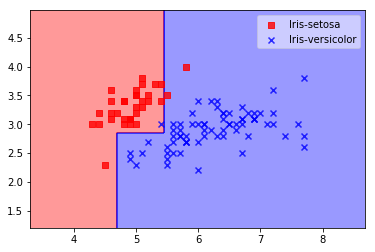

In [31]:
#Lets plot the decision surface
print " Plotting the Decision Surface of Training Set... "
t.plot_decision_regions(Xtrain[:,feat],Ytrain,clf=dt, res=0.02, cycle_marker=True, legend=1)

 Plotting the Decision Surface of Test Set... 


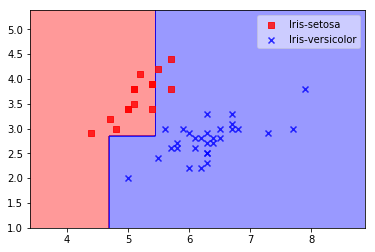

In [32]:
print " Plotting the Decision Surface of Test Set... "
t.plot_decision_regions(Xtest[:,feat],Ytest,clf=dt, res=0.02, cycle_marker=True, legend=1)

In [33]:
from nose.tools import assert_greater_equal
feat=[0,1]
dt=DecisionTree(0.95,5)
dt.train(Xtrain[:,feat],Ytrain)
pclasses=dt.predict(Xtest[:,feat])
acc = np.sum(pclasses==Ytest)/float(Ytest.shape[0])
assert_greater_equal(acc, 0.90)

# Lets Train on all four features....

In [34]:
#Lets Train on all four features....

# Lets train a Decision Tree Classifier on Petal Length and Width
feat=[0, 1, 2, 3]
dt=DecisionTree(0.95,5)
dt.train(Xtrain[:,feat],Ytrain)
pclasses=dt.predict(Xtest[:,feat])
#Lets see how good we are doing, by finding the accuracy on the test set..
print np.sum(pclasses==Ytest)
print "Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0])

45
Accuracy =  1.0


# Lets Train on all four features and for all three classes....

In [35]:
X=np.asarray(data[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y=np.asarray(data['Class'].dropna())
print " Data Set Dimensions=", X.shape, " True Class labels dimensions", Y.shape

 Data Set Dimensions= (149, 4)  True Class labels dimensions (149,)


In [36]:
# Split your data into training and test-set... 
# see the documentation of split_data in tools for further information...
Xtrain,Ytrain,Xtest,Ytest=t.split_data(X,Y)

print " Training Data Set Dimensions=", Xtrain.shape, "Training True Class labels dimensions", Ytrain.shape   
print " Test Data Set Dimensions=", Xtest.shape, "Test True Class labels dimensions", Ytrain.shape   

 Training Data Set Dimensions= (104, 4) Training True Class labels dimensions (104,)
 Test Data Set Dimensions= (45, 4) Test True Class labels dimensions (104,)


In [37]:
feat=[0, 1, 2, 3]
dt=DecisionTree(0.95,5)
dt.train(Xtrain[:,feat],Ytrain)
pclasses=dt.predict(Xtest[:,feat])
#Lets see how good we are doing, by finding the accuracy on the test set..
print np.sum(pclasses==Ytest)
print "Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0])

42
Accuracy =  0.933333333333


In [38]:
from nose.tools import assert_greater_equal

feat=[0, 1, 2, 3]
dt=DecisionTree(0.95,5)
dt.train(Xtrain[:,feat],Ytrain)
pclasses=dt.predict(Xtest[:,feat])
#Lets see how good we are doing, by finding the accuracy on the test set..
acc = np.sum(pclasses==Ytest)/float(Ytest.shape[0])
assert_greater_equal(acc, 0.90)

What can you conclude ?
====================
Please write your observation....



# Cross-Validation

Until now we have been splitting the dataset into a training and test set rather randomly and were reporting a rather artifical performance. Now we are going to test our system exhaustively by making use of k-fold [cross validation](http://en.wikipedia.org/wiki/Cross-validation_%28statistics%29). 

Now go and tune your hyper-parameters (purity, exthreshold) to opitmize the performance.

In [39]:
# Now lets cross validate for best paramters, and test the result...
# We will be training four different models on four different partitions of data set and 
# then will be reporting the mean accuracy of the four classifiers.

nfolds=4 # lets use four folds..
folds=t.generate_folds(X,Y,nfolds)
features=[0,1, 2, 3] # features to use for our system
#now lets train and test on these folds...

#Lets perform the grid search...
purity=np.linspace(0.85,0.97,13) # You can also search over depth as well....
nexamp=np.linspace(5,25,21)  

params=np.zeros((len(purity),len(nexamp)))

Generating CV data for 3 classes
[Info] Fold 1 Accuracy = 0.972222222222
[Info] Fold 2 Accuracy = 0.944444444444
[Info] Fold 3 Accuracy = 0.972222222222
[Info] Fold 4 Accuracy = 0.944444444444
[0.97222222222222221, 0.94444444444444442, 0.97222222222222221, 0.94444444444444442] 
Purity=0.85, Nexample-threshold=5.0, Mean Accuracy =0.958333333333
[Info] Fold 1 Accuracy = 0.972222222222
[Info] Fold 2 Accuracy = 0.944444444444
[Info] Fold 3 Accuracy = 0.972222222222
[Info] Fold 4 Accuracy = 0.944444444444
[0.97222222222222221, 0.94444444444444442, 0.97222222222222221, 0.94444444444444442] 
Purity=0.85, Nexample-threshold=6.0, Mean Accuracy =0.958333333333
[Info] Fold 1 Accuracy = 0.972222222222
[Info] Fold 2 Accuracy = 0.944444444444
[Info] Fold 3 Accuracy = 0.972222222222
[Info] Fold 4 Accuracy = 0.944444444444
[0.97222222222222221, 0.94444444444444442, 0.97222222222222221, 0.94444444444444442] 
Purity=0.85, Nexample-threshold=7.0, Mean Accuracy =0.958333333333
[Info] Fold 1 Accuracy = 0.9

[Info] Fold 4 Accuracy = 0.944444444444
[0.97222222222222221, 0.94444444444444442, 0.97222222222222221, 0.94444444444444442] 
Purity=0.86, Nexample-threshold=10.0, Mean Accuracy =0.958333333333
[Info] Fold 1 Accuracy = 0.972222222222
[Info] Fold 2 Accuracy = 0.944444444444
[Info] Fold 3 Accuracy = 0.972222222222
[Info] Fold 4 Accuracy = 0.944444444444
[0.97222222222222221, 0.94444444444444442, 0.97222222222222221, 0.94444444444444442] 
Purity=0.86, Nexample-threshold=11.0, Mean Accuracy =0.958333333333
[Info] Fold 1 Accuracy = 0.972222222222
[Info] Fold 2 Accuracy = 0.944444444444
[Info] Fold 3 Accuracy = 0.972222222222
[Info] Fold 4 Accuracy = 0.944444444444
[0.97222222222222221, 0.94444444444444442, 0.97222222222222221, 0.94444444444444442] 
Purity=0.86, Nexample-threshold=12.0, Mean Accuracy =0.958333333333
[Info] Fold 1 Accuracy = 0.972222222222
[Info] Fold 2 Accuracy = 0.944444444444
[Info] Fold 3 Accuracy = 0.972222222222
[Info] Fold 4 Accuracy = 0.944444444444
[0.972222222222222

[Info] Fold 1 Accuracy = 0.972222222222
[Info] Fold 2 Accuracy = 0.944444444444
[Info] Fold 3 Accuracy = 0.972222222222
[Info] Fold 4 Accuracy = 0.944444444444
[0.97222222222222221, 0.94444444444444442, 0.97222222222222221, 0.94444444444444442] 
Purity=0.87, Nexample-threshold=16.0, Mean Accuracy =0.958333333333
[Info] Fold 1 Accuracy = 0.972222222222
[Info] Fold 2 Accuracy = 0.944444444444
[Info] Fold 3 Accuracy = 0.972222222222
[Info] Fold 4 Accuracy = 0.944444444444
[0.97222222222222221, 0.94444444444444442, 0.97222222222222221, 0.94444444444444442] 
Purity=0.87, Nexample-threshold=17.0, Mean Accuracy =0.958333333333
[Info] Fold 1 Accuracy = 0.972222222222
[Info] Fold 2 Accuracy = 0.944444444444
[Info] Fold 3 Accuracy = 0.972222222222
[Info] Fold 4 Accuracy = 0.944444444444
[0.97222222222222221, 0.94444444444444442, 0.97222222222222221, 0.94444444444444442] 
Purity=0.87, Nexample-threshold=18.0, Mean Accuracy =0.958333333333
[Info] Fold 1 Accuracy = 0.972222222222
[Info] Fold 2 Accu

[Info] Fold 2 Accuracy = 0.944444444444
[Info] Fold 3 Accuracy = 0.972222222222
[Info] Fold 4 Accuracy = 0.944444444444
[0.97222222222222221, 0.94444444444444442, 0.97222222222222221, 0.94444444444444442] 
Purity=0.88, Nexample-threshold=21.0, Mean Accuracy =0.958333333333
[Info] Fold 1 Accuracy = 0.972222222222
[Info] Fold 2 Accuracy = 0.944444444444
[Info] Fold 3 Accuracy = 0.972222222222
[Info] Fold 4 Accuracy = 0.944444444444
[0.97222222222222221, 0.94444444444444442, 0.97222222222222221, 0.94444444444444442] 
Purity=0.88, Nexample-threshold=22.0, Mean Accuracy =0.958333333333
[Info] Fold 1 Accuracy = 0.972222222222
[Info] Fold 2 Accuracy = 0.944444444444
[Info] Fold 3 Accuracy = 0.972222222222
[Info] Fold 4 Accuracy = 0.944444444444
[0.97222222222222221, 0.94444444444444442, 0.97222222222222221, 0.94444444444444442] 
Purity=0.88, Nexample-threshold=23.0, Mean Accuracy =0.958333333333
[Info] Fold 1 Accuracy = 0.972222222222
[Info] Fold 2 Accuracy = 0.944444444444
[Info] Fold 3 Accu

[Info] Fold 4 Accuracy = 0.944444444444
[0.97222222222222221, 0.94444444444444442, 0.97222222222222221, 0.94444444444444442] 
Purity=0.9, Nexample-threshold=5.0, Mean Accuracy =0.958333333333
[Info] Fold 1 Accuracy = 0.972222222222
[Info] Fold 2 Accuracy = 0.944444444444
[Info] Fold 3 Accuracy = 0.972222222222
[Info] Fold 4 Accuracy = 0.944444444444
[0.97222222222222221, 0.94444444444444442, 0.97222222222222221, 0.94444444444444442] 
Purity=0.9, Nexample-threshold=6.0, Mean Accuracy =0.958333333333
[Info] Fold 1 Accuracy = 0.972222222222
[Info] Fold 2 Accuracy = 0.944444444444
[Info] Fold 3 Accuracy = 0.972222222222
[Info] Fold 4 Accuracy = 0.944444444444
[0.97222222222222221, 0.94444444444444442, 0.97222222222222221, 0.94444444444444442] 
Purity=0.9, Nexample-threshold=7.0, Mean Accuracy =0.958333333333
[Info] Fold 1 Accuracy = 0.972222222222
[Info] Fold 2 Accuracy = 0.944444444444
[Info] Fold 3 Accuracy = 0.972222222222
[Info] Fold 4 Accuracy = 0.944444444444
[0.97222222222222221, 0.

[Info] Fold 2 Accuracy = 0.944444444444
[Info] Fold 3 Accuracy = 0.972222222222
[Info] Fold 4 Accuracy = 0.972222222222
[0.97222222222222221, 0.94444444444444442, 0.97222222222222221, 0.97222222222222221] 
Purity=0.91, Nexample-threshold=11.0, Mean Accuracy =0.965277777778
[Info] Fold 1 Accuracy = 0.972222222222
[Info] Fold 2 Accuracy = 0.944444444444
[Info] Fold 3 Accuracy = 0.972222222222
[Info] Fold 4 Accuracy = 0.972222222222
[0.97222222222222221, 0.94444444444444442, 0.97222222222222221, 0.97222222222222221] 
Purity=0.91, Nexample-threshold=12.0, Mean Accuracy =0.965277777778
[Info] Fold 1 Accuracy = 0.972222222222
[Info] Fold 2 Accuracy = 0.944444444444
[Info] Fold 3 Accuracy = 0.972222222222
[Info] Fold 4 Accuracy = 0.972222222222
[0.97222222222222221, 0.94444444444444442, 0.97222222222222221, 0.97222222222222221] 
Purity=0.91, Nexample-threshold=13.0, Mean Accuracy =0.965277777778
[Info] Fold 1 Accuracy = 0.972222222222
[Info] Fold 2 Accuracy = 0.944444444444
[Info] Fold 3 Accu

[Info] Fold 4 Accuracy = 0.972222222222
[0.97222222222222221, 0.94444444444444442, 0.97222222222222221, 0.97222222222222221] 
Purity=0.92, Nexample-threshold=16.0, Mean Accuracy =0.965277777778
[Info] Fold 1 Accuracy = 0.972222222222
[Info] Fold 2 Accuracy = 0.944444444444
[Info] Fold 3 Accuracy = 0.972222222222
[Info] Fold 4 Accuracy = 0.972222222222
[0.97222222222222221, 0.94444444444444442, 0.97222222222222221, 0.97222222222222221] 
Purity=0.92, Nexample-threshold=17.0, Mean Accuracy =0.965277777778
[Info] Fold 1 Accuracy = 0.972222222222
[Info] Fold 2 Accuracy = 0.944444444444
[Info] Fold 3 Accuracy = 0.972222222222
[Info] Fold 4 Accuracy = 0.972222222222
[0.97222222222222221, 0.94444444444444442, 0.97222222222222221, 0.97222222222222221] 
Purity=0.92, Nexample-threshold=18.0, Mean Accuracy =0.965277777778
[Info] Fold 1 Accuracy = 0.972222222222
[Info] Fold 2 Accuracy = 0.944444444444
[Info] Fold 3 Accuracy = 0.972222222222
[Info] Fold 4 Accuracy = 0.972222222222
[0.972222222222222

[Info] Fold 2 Accuracy = 0.944444444444
[Info] Fold 3 Accuracy = 0.972222222222
[Info] Fold 4 Accuracy = 0.972222222222
[0.97222222222222221, 0.94444444444444442, 0.97222222222222221, 0.97222222222222221] 
Purity=0.93, Nexample-threshold=22.0, Mean Accuracy =0.965277777778
[Info] Fold 1 Accuracy = 0.972222222222
[Info] Fold 2 Accuracy = 0.944444444444
[Info] Fold 3 Accuracy = 0.972222222222
[Info] Fold 4 Accuracy = 0.972222222222
[0.97222222222222221, 0.94444444444444442, 0.97222222222222221, 0.97222222222222221] 
Purity=0.93, Nexample-threshold=23.0, Mean Accuracy =0.965277777778
[Info] Fold 1 Accuracy = 0.972222222222
[Info] Fold 2 Accuracy = 0.944444444444
[Info] Fold 3 Accuracy = 0.972222222222
[Info] Fold 4 Accuracy = 0.972222222222
[0.97222222222222221, 0.94444444444444442, 0.97222222222222221, 0.97222222222222221] 
Purity=0.93, Nexample-threshold=24.0, Mean Accuracy =0.965277777778
[Info] Fold 1 Accuracy = 0.972222222222
[Info] Fold 2 Accuracy = 0.944444444444
[Info] Fold 3 Accu

[Info] Fold 4 Accuracy = 0.972222222222
[0.94444444444444442, 0.94444444444444442, 0.97222222222222221, 0.97222222222222221] 
Purity=0.95, Nexample-threshold=6.0, Mean Accuracy =0.958333333333
[Info] Fold 1 Accuracy = 0.944444444444
[Info] Fold 2 Accuracy = 0.944444444444
[Info] Fold 3 Accuracy = 0.972222222222
[Info] Fold 4 Accuracy = 0.972222222222
[0.94444444444444442, 0.94444444444444442, 0.97222222222222221, 0.97222222222222221] 
Purity=0.95, Nexample-threshold=7.0, Mean Accuracy =0.958333333333
[Info] Fold 1 Accuracy = 0.944444444444
[Info] Fold 2 Accuracy = 0.944444444444
[Info] Fold 3 Accuracy = 0.972222222222
[Info] Fold 4 Accuracy = 0.972222222222
[0.94444444444444442, 0.94444444444444442, 0.97222222222222221, 0.97222222222222221] 
Purity=0.95, Nexample-threshold=8.0, Mean Accuracy =0.958333333333
[Info] Fold 1 Accuracy = 0.944444444444
[Info] Fold 2 Accuracy = 0.944444444444
[Info] Fold 3 Accuracy = 0.972222222222
[Info] Fold 4 Accuracy = 0.972222222222
[0.94444444444444442,

[Info] Fold 2 Accuracy = 0.944444444444
[Info] Fold 3 Accuracy = 0.972222222222
[Info] Fold 4 Accuracy = 0.972222222222
[0.94444444444444442, 0.94444444444444442, 0.97222222222222221, 0.97222222222222221] 
Purity=0.96, Nexample-threshold=12.0, Mean Accuracy =0.958333333333
[Info] Fold 1 Accuracy = 0.972222222222
[Info] Fold 2 Accuracy = 0.944444444444
[Info] Fold 3 Accuracy = 0.972222222222
[Info] Fold 4 Accuracy = 0.972222222222
[0.97222222222222221, 0.94444444444444442, 0.97222222222222221, 0.97222222222222221] 
Purity=0.96, Nexample-threshold=13.0, Mean Accuracy =0.965277777778
[Info] Fold 1 Accuracy = 0.972222222222
[Info] Fold 2 Accuracy = 0.944444444444
[Info] Fold 3 Accuracy = 0.972222222222
[Info] Fold 4 Accuracy = 0.972222222222
[0.97222222222222221, 0.94444444444444442, 0.97222222222222221, 0.97222222222222221] 
Purity=0.96, Nexample-threshold=14.0, Mean Accuracy =0.965277777778
[Info] Fold 1 Accuracy = 0.972222222222
[Info] Fold 2 Accuracy = 0.944444444444
[Info] Fold 3 Accu

[Info] Fold 4 Accuracy = 0.972222222222
[0.97222222222222221, 0.94444444444444442, 0.97222222222222221, 0.97222222222222221] 
Purity=0.97, Nexample-threshold=17.0, Mean Accuracy =0.965277777778
[Info] Fold 1 Accuracy = 0.972222222222
[Info] Fold 2 Accuracy = 0.944444444444
[Info] Fold 3 Accuracy = 0.972222222222
[Info] Fold 4 Accuracy = 0.972222222222
[0.97222222222222221, 0.94444444444444442, 0.97222222222222221, 0.97222222222222221] 
Purity=0.97, Nexample-threshold=18.0, Mean Accuracy =0.965277777778
[Info] Fold 1 Accuracy = 0.972222222222
[Info] Fold 2 Accuracy = 0.944444444444
[Info] Fold 3 Accuracy = 0.972222222222
[Info] Fold 4 Accuracy = 0.972222222222
[0.97222222222222221, 0.94444444444444442, 0.97222222222222221, 0.97222222222222221] 
Purity=0.97, Nexample-threshold=19.0, Mean Accuracy =0.965277777778
[Info] Fold 1 Accuracy = 0.972222222222
[Info] Fold 2 Accuracy = 0.944444444444
[Info] Fold 3 Accuracy = 0.972222222222
[Info] Fold 4 Accuracy = 0.972222222222
[0.972222222222222

In [ ]:
np.save('dt-cv',params)

In [ ]:
print params

In [ ]:
print params.shape

In [ ]:
plt.imshow(params) # displayc the accuracy as 2D image...

Text(0.5,0,u'Mean Accuracy across 4-Folds')

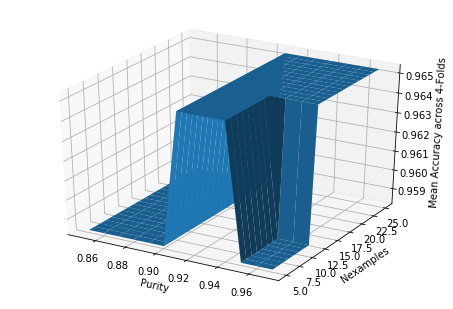

In [41]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
tX, tY = np.meshgrid(purity, nexamp)
ax.plot_surface(tX,tY,params.T)
ax.set_xlabel('Purity')
ax.set_ylabel('Nexamples')
ax.set_zlabel('Mean Accuracy across {}-Folds'.format(nfolds))
# ax.scatter3D(data['SepalLength'],data['PetalLength'],data['PetalWidth'])
#(params,ax,'Purity','Example-Threshold','Mean-Accuracy')

In [ ]:
print params.shape, tX.shape, tY.shape

In [ ]:
#print the row and column  index of m
#single line code
ridx,cidx= np.unravel_index(np.argmax(params), params.shape)

# simple step-wise code

cidx=np.argmax(params.max(axis=0))
ridx=np.argmax(params[:,cidx])
print ridx, cidx

In [ ]:
print 'CV Best Parameters are, purity={}, nexamp={}, mean accuracy={}'.format(purity[ridx],nexamp[cidx],params[ridx,cidx])

In [ ]:
print purity[ridx],nexamp[cidx]
dt=DecisionTree(purity[ridx],nexamp[cidx])
dt.train(Xtrain[:,feat],Ytrain)
pclasses=dt.predict(Xtest[:,feat])
#Lets see how good we are doing, by finding the accuracy on the test set..
print np.sum(pclasses==Ytest)
print "Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0])

In [ ]:
print dt.find_depth()

In [ ]:
print dt